<a href="https://colab.research.google.com/github/Auber8a/PruebaIIBimestre/blob/main/Determinantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mínimos cuadrados
## Prueba 02
Interpole los siguientes conjuntos de datos con la función correspondiente.

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al realizar el proceso de mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$

In [35]:
# -*- coding: utf-8 -*-
"""
Python 3
05 / 07 / 2024
@author: z_tjona

"I find that I don't understand things unless I try to program them."
-Donald E. Knuth
"""

# ----------------------------- logging --------------------------
import logging
from sys import stdout
from datetime import datetime

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

import numpy as np


# ####################################################################
def eliminacion_gaussiana(A: np.ndarray) -> np.ndarray:
    """Resuelve un sistema de ecuaciones lineales mediante el método de eliminación gaussiana.

    ## Parameters

    ``A``: matriz aumentada del sistema de ecuaciones lineales. Debe ser de tamaño n-by-(n+1), donde n es el número de incógnitas.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A)
    assert A.shape[0] == A.shape[1] - 1, "La matriz A debe ser de tamaño n-by-(n+1)."
    n = A.shape[0]

    for i in range(0, n - 1):  # loop por columna

        # --- encontrar pivote
        p = None  # default, first element
        for pi in range(i, n):
            if A[pi, i] == 0:
                # must be nonzero
                continue

            if p is None:
                # first nonzero element
                p = pi
                continue

            if abs(A[pi, i]) < abs(A[p, i]):
                p = pi

        if p is None:
            # no pivot found.
            raise ValueError("No existe solución única.")

        if p != i:
            # swap rows
            logging.debug(f"Intercambiando filas {i} y {p}")
            _aux = A[i, :].copy()
            A[i, :] = A[p, :].copy()
            A[p, :] = _aux

        # --- Eliminación: loop por fila
        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]
            A[j, i:] = A[j, i:] - m * A[i, i:]

        logging.info(f"\n{A}")

    if A[n - 1, n - 1] == 0:
        raise ValueError("No existe solución única.")

        print(f"\n{A}")
    # --- Sustitución hacia atrás
    solucion = np.zeros(n)
    solucion[n - 1] = A[n - 1, n] / A[n - 1, n - 1]

    for i in range(n - 2, -1, -1):
        suma = 0
        for j in range(i + 1, n):
            suma += A[i, j] * solucion[j]
        solucion[i] = (A[i, n] - suma) / A[i, i]

    return solucion


# ####################################################################
def descomposicion_LU(A: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """Realiza la descomposición LU de una matriz cuadrada A.
    [IMPORTANTE] No se realiza pivoteo.

    ## Parameters

    ``A``: matriz cuadrada de tamaño n-by-n.

    ## Return

    ``L``: matriz triangular inferior.

    ``U``: matriz triangular superior. Se obtiene de la matriz ``A`` después de aplicar la eliminación gaussiana.
    """

    A = np.array(
        A, dtype=float
    )  # convertir en float, porque si no, puede convertir como entero

    assert A.shape[0] == A.shape[1], "La matriz A debe ser cuadrada."
    n = A.shape[0]

    L = np.zeros((n, n), dtype=float)

    for i in range(0, n):  # loop por columna

        # --- deterimnar pivote
        if A[i, i] == 0:
            raise ValueError("No existe solución única.")

        # --- Eliminación: loop por fila
        L[i, i] = 1
        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]
            A[j, i:] = A[j, i:] - m * A[i, i:]

            L[j, i] = m

        logging.info(f"\n{A}")

    if A[n - 1, n - 1] == 0:
        raise ValueError("No existe solución única.")

    return L, A


# ####################################################################
def resolver_LU(L: np.ndarray, U: np.ndarray, b: np.ndarray) -> np.ndarray:
    """Resuelve un sistema de ecuaciones lineales mediante la descomposición LU.

    ## Parameters

    ``L``: matriz triangular inferior.

    ``U``: matriz triangular superior.

    ``b``: vector de términos independientes.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """

    n = L.shape[0]

    # --- Sustitución hacia adelante
    logging.info("Sustitución hacia adelante")

    y = np.zeros((n, 1), dtype=float)

    y[0] = b[0] / L[0, 0]

    for i in range(1, n):
        suma = 0
        for j in range(i):
            suma += L[i, j] * y[j]
        y[i] = (b[i] - suma) / L[i, i]

    logging.info(f"y = \n{y}")

    # --- Sustitución hacia atrás
    logging.info("Sustitución hacia atrás")
    sol = np.zeros((n, 1), dtype=float)

    sol[-1] = y[-1] / U[-1, -1]

    for i in range(n - 2, -1, -1):
        logging.info(f"i = {i}")
        suma = 0
        for j in range(i + 1, n):
            suma += U[i, j] * sol[j]
        logging.info(f"suma = {suma}")
        logging.info(f"U[i, i] = {U[i, i]}")
        logging.info(f"y[i] = {y[i]}")
        sol[i] = (y[i] - suma) / U[i, i]

    logging.debug(f"x = \n{sol}")
    return sol


# ####################################################################
def matriz_aumentada(A: np.ndarray, b: np.ndarray) -> np.ndarray:
    """Construye la matriz aumentada de un sistema de ecuaciones lineales.

    ## Parameters

    ``A``: matriz de coeficientes.

    ``b``: vector de términos independientes.

    ## Return

    ``a``:

    """
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    if not isinstance(b, np.ndarray):
        b = np.array(b, dtype=float)
    assert A.shape[0] == b.shape[0], "Las dimensiones de A y b no coinciden."
    return np.hstack((A, b.reshape(-1, 1)))


# ####################################################################
def separar_m_aumentada(Ab: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """Separa la matriz aumentada en la matriz de coeficientes y el vector de términos independientes.

    ## Parameters
    ``Ab``: matriz aumentada.

    ## Return
    ``A``: matriz de coeficientes.
    ``b``: vector de términos independientes.
    """
    logging.debug(f"Ab = \n{Ab}")
    if not isinstance(Ab, np.ndarray):
        logging.debug("Convirtiendo Ab a numpy array")
        Ab = np.array(Ab, dtype=float)
    return Ab[:, :-1], Ab[:, -1].reshape(-1, 1)

In [36]:
# -*- coding: utf-8 -*-


"""
Python 3
17 / 07 / 2024
@author: z_tjona

"I find that I don't understand things unless I try to program them."
-Donald E. Knuth
"""


# ----------------------------- logging --------------------------
import logging
from sys import stdout
from datetime import datetime

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

import numpy as np

from typing import Callable

#from src import eliminacion_gaussiana


# ####################################################################
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float]], tuple]],
) -> list[float]:
    """Resuelve el sistema de ecuaciones para encontrar los parámetros del método de mínimos cuadrados.
    Plantea el sistema de ecuaciones lineales al reemplazar los valores de ``xs`` y ``ys`` en las derivadas parciales.

    ## Parameters

    ``xs``: lista con los valores de x.

    ``ys``: lista con los valores de y.

    ``gradiente``: lista con las funciones de derivadas parciales de ``fcn``.
    [IMPORTANTE] Cada función debe ser de la forma ``der_parcial(xi, yi)->c_n * a_n + + c_(n-1)*a_(n-1) + ... + c_1*a_1 + c_0 * a_0 = c_ind``.

    ## Return

    ``params``: lista con los parámetros ajustados, e.g. (a_n, a_(n-1), ..., a_1, a_0).

    """

    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."

    n = len(xs)

    num_pars = len(gradiente)
    logging.info(f"Se ajustarán {num_pars} parámetros.")
    # --- construir matriz A y vector b
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)

    for i, der_parcial in enumerate(gradiente):
        assert callable(der_parcial), "Cada derivada parcial debe ser una función."

        Ab[i, :] = der_parcial(xs, ys)

    return list(eliminacion_gaussiana(Ab))

# Conjunto de datos de ejemplo

## Conjunto de datos 1

In [37]:
xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

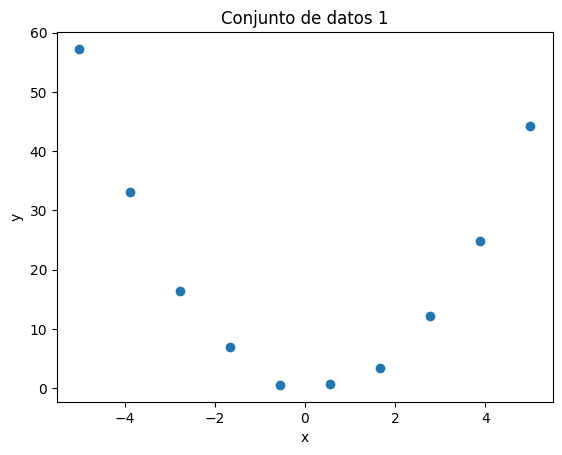

In [ ]:
plt.scatter(xs1, ys1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 1")
plt.show()

Interpole el conjunto de datos 1 usando la función cuadrática.

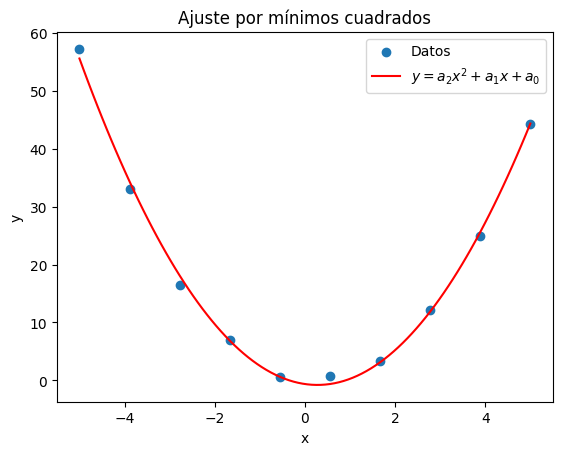

In [38]:

def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 2.

    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
    ``xs``: lista de valores de x.
    ``ys``: lista de valores de y.

    ## Return
    ``c_2``: coeficiente del parámetro 2.
    ``c_1``: coeficiente del parámetro 1.
    ``c_0``: coeficiente del parámetro 0.
    ``c_ind``: coeficiente del término independiente.
    """
    c_2 = sum(xi**4 for xi in xs)
    c_1 = sum(xi**3 for xi in xs)
    c_0 = sum(xi**2 for xi in xs)
    c_ind = sum(yi * xi**2 for yi, xi in zip(ys, xs))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1.

    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
    ``xs``: lista de valores de x.
    ``ys``: lista de valores de y.

    ## Return
    ``c_2``: coeficiente del parámetro 2.
    ``c_1``: coeficiente del parámetro 1.
    ``c_0``: coeficiente del parámetro 0.
    ``c_ind``: coeficiente del término independiente.
    """
    c_2 = sum(xi**3 for xi in xs)
    c_1 = sum(xi**2 for xi in xs)
    c_0 = sum(xi for xi in xs)
    c_ind = sum(yi * xi for yi, xi in zip(ys, xs))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0.

    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
    ``xs``: lista de valores de x.
    ``ys``: lista de valores de y.

    ## Return
    ``c_2``: coeficiente del parámetro 2.
    ``c_1``: coeficiente del parámetro 1.
    ``c_0``: coeficiente del parámetro 0.
    ``c_ind``: coeficiente del término independiente.
    """
    c_2 = sum(xi**2 for xi in xs)
    c_1 = sum(xi for xi in xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return (c_2, c_1, c_0, c_ind)

def parabola(x: float, pars: tuple[float, float, float]) -> float:
    """Ecuación de la parábola y = a2 * x^2 + a1 * x + a0.

    ## Parameters
    ``x``: valor de x.
    ``pars``: parámetros de la parábola. Deben ser de la forma (a2, a1, a0).

    ## Return
    ``y``: valor de y.
    """
    a2, a1, a0 = pars
    return a2 * x**2 + a1 * x + a0

xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

#from src import ajustar_min_cuadrados
pars2 = ajustar_min_cuadrados(xs1, ys1, gradiente=[der_parcial_2, der_parcial_1, der_parcial_0])
pars2 # parámetros de la curva ajustada

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
y = [parabola(xi, pars2) for xi in x]

plt.scatter(xs1, ys1, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_2 x^2 + a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()

## Conjunto de datos 2

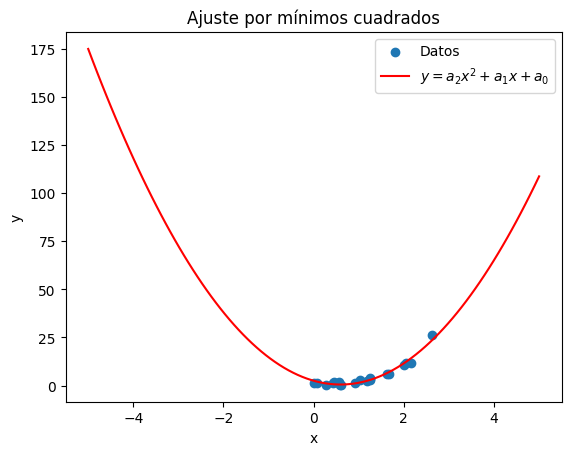

In [39]:
xs2 = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys2 = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]



#from src import ajustar_min_cuadrados
pars2 = ajustar_min_cuadrados(xs2, ys2, gradiente=[der_parcial_2, der_parcial_1, der_parcial_0])
pars2 # parámetros de la curva ajustada

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
y = [parabola(xi, pars2) for xi in x]

plt.scatter(xs2, ys2, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_2 x^2 + a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()

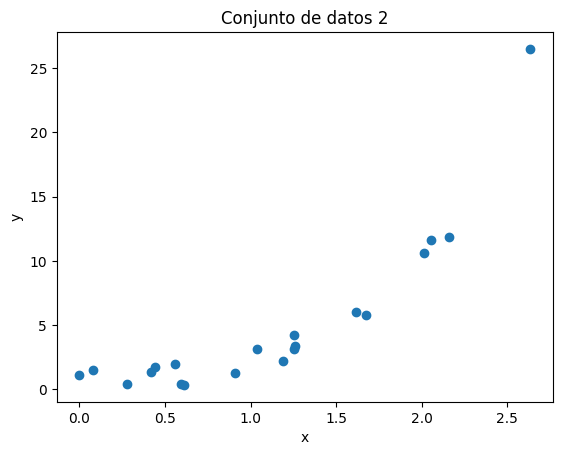

In [ ]:
plt.scatter(xs2, ys2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 2")
plt.show()

Interpole el conjunto de datos 2 usando la función exponencial.